<a href="https://colab.research.google.com/github/Eric-BR2001/DataScience/blob/master/Quarentena_Aula_4(Alura).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import matplotlib.pyplot as plt

import numpy as np
import seaborn as sns
%precision %.2f
pd.options.display.float_format = '{:,.2f}'.format

uri = "https://github.com/guilhermesilveira/enem-2018/blob/master/MICRODADOS_ENEM_2018_SAMPLE_43278.csv?raw=true"
dados = pd.read_csv(uri)


In [0]:
dados.describe()

,NU_INSCRICAO,NU_ANO,CO_MUNICIPIO_RESIDENCIA,CO_UF_RESIDENCIA,NU_IDADE,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,CO_MUNICIPIO_NASCIMENTO,CO_UF_NASCIMENTO,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,TP_ENSINO,IN_TREINEIRO,CO_ESCOLA,CO_MUNICIPIO_ESC,CO_UF_ESC,TP_DEPENDENCIA_ADM_ESC,TP_LOCALIZACAO_ESC,TP_SIT_FUNC_ESC,IN_BAIXA_VISAO,IN_CEGUEIRA,IN_SURDEZ,IN_DEFICIENCIA_AUDITIVA,IN_SURDO_CEGUEIRA,IN_DEFICIENCIA_FISICA,IN_DEFICIENCIA_MENTAL,IN_DEFICIT_ATENCAO,IN_DISLEXIA,IN_DISCALCULIA,IN_AUTISMO,IN_VISAO_MONOCULAR,IN_OUTRA_DEF,IN_GESTANTE,IN_LACTANTE,IN_IDOSO,IN_ESTUDA_CLASSE_HOSPITALAR,IN_SEM_RECURSO,IN_BRAILLE,...,IN_CADEIRA_ACOLCHOADA,IN_PROVA_DEITADO,IN_MOBILIARIO_OBESO,IN_LAMINA_OVERLAY,IN_PROTETOR_AURICULAR,IN_MEDIDOR_GLICOSE,IN_MAQUINA_BRAILE,IN_SOROBAN,IN_MARCA_PASSO,IN_SONDA,IN_MEDICAMENTOS,IN_SALA_INDIVIDUAL,IN_SALA_ESPECIAL,IN_SALA_ACOMPANHANTE,IN_MOBILIARIO_ESPECIFICO,IN_MATERIAL_ESPECIFICO,IN_NOME_SOCIAL,CO_MUNICIPIO_PROVA,CO_UF_PROVA,TP_PRESENCA_CN,TP_PRESENCA_CH,TP_PRESENCA_LC,TP_PRESENCA_MT,CO_PROVA_CN,CO_PROVA_CH,CO_PROVA_LC,CO_PROVA_MT,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,TP_LINGUA,TP_STATUS_REDACAO,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO,Q005
count,"137,844.00","137,844.00","137,844.00","137,844.00","137,843.00","132,485.00","137,844.00","137,844.00","133,140.00","133,140.00","137,844.00","137,844.00","137,844.00","86,900.00","137,844.00","36,232.00","36,232.00","36,232.00","36,232.00","36,232.00","36,232.00","137,844.00","137,844.00","137,844.00","137,844.00","137,844.00","137,844.00","137,844.00","137,844.00","137,844.00","137,844.00","137,844.00","137,844.00","137,844.00","137,844.00","137,844.00","137,844.00","137,844.00","137,844.00","137,844.00",...,"137,844.00","137,844.00","137,844.00","137,844.00","137,844.00","137,844.00","137,844.00","137,844.00","137,844.00","137,844.00","137,844.00","137,844.00","137,844.00","137,844.00","137,844.00","137,844.00","137,844.00","137,844.00","137,844.00","137,838.00","137,838.00","137,838.00","137,838.00","97,537.00","103,774.00","103,774.00","97,537.00","97,537.00","103,774.00","103,774.00","97,537.00","137,844.00","103,774.00","103,774.00","103,774.00","103,774.00","103,774.00","103,774.00","103,774.00","137,844.00"
mean,"180,010,423,553.31","2,018.00","3,118,377.40",31.03,22.38,0.12,2.12,1.04,"3,085,664.65",30.70,1.54,3.00,1.34,1.20,0.10,"31,587,077.66","3,160,970.21",31.45,2.31,1.03,1.01,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,"3,119,912.84",31.05,0.71,0.75,0.75,0.71,448.51,452.52,456.51,460.50,493.63,568.31,526.59,535.18,0.53,1.10,121.73,101.70,97.18,117.03,71.50,509.13,3.90
std,"1,918,950.00",0.00,"994,483.04",9.92,7.61,0.38,1.02,0.23,"975,680.73",9.72,0.72,4.00,0.70,0.60,0.29,"9,765,074.33","979,871.51",9.77,0.78,0.18,0.12,0.03,0.01,0.02,0.02,0.00,0.04,0.02,0.03,0.01,0.01,0.01,0.02,0.03,0.02,0.03,0.00,0.00,0.04,0.01,...,0.00,0.00,0.00,0.00,0.00,0.01,0.00,0.00,0.00,0.00,0.01,0.01,0.00,0.00,0.00,0.00,0.01,"994,800.12",9.92,0.46,0.43,0.43,0.46,1.21,1.33,1.31,1.14,74.18,81.03,73.02,102.83,0.50,0.69,31.32,49.51,47.00,35.20,52.21,187.01,1.51
min,"180,007,186,686.00","2,018.00","1,100,015.00",11.00,13.00,0.00,0.00,0.00,"1,100,015.00",11.00,1.00,0.00,1.00,1.00,0.00,"11,000,058.00","1,100,015.00",11.00,1.00,1.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,"1,100,015.00",11.00,0.00,0.00,0.00,0.00,447.00,451.00,455.00,459.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00
25%,"180,008,761,760.75","2,018.00","2,409,100.00",24.00,18.00,0.00,1.00,1.00,"2,408,102.00",24.00,1.00,0.00,1.00,1.00,0.00,"24,328,308.00","2,414,407.00",24.00,2.00,1.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.

In [0]:
colunas_de_notas = ['NU_NOTA_CN','NU_NOTA_CH','NU_NOTA_LC','NU_NOTA_MT','NU_NOTA_REDACAO']
dados[colunas_de_notas].head()
dados_notas = dados[colunas_de_notas].dropna()
dados_notas.columns = ['ciencias_naturais','ciencias_humanas','linguagem_codigo','matematica','redacao']
dados_notas.head()

,ciencias_naturais,ciencias_humanas,linguagem_codigo,matematica,redacao
1,523.10,671.30,661.60,738.00,680.00
2,409.20,531.70,389.00,438.10,600.00
3,452.30,505.50,448.50,544.90,400.00
6,428.50,505.20,521.00,436.80,560.00
8,491.80,575.70,524.40,487.60,660.00


In [0]:
#Correlação
dados_notas.corr()

,ciencias_naturais,ciencias_humanas,linguagem_codigo,matematica,redacao
ciencias_naturais,1.00,0.57,0.60,0.58,0.51
ciencias_humanas,0.57,1.00,0.70,0.53,0.50
linguagem_codigo,0.60,0.70,1.00,0.57,0.56
matematica,0.58,0.53,0.57,1.00,0.48
redacao,0.51,0.50,0.56,0.48,1.00


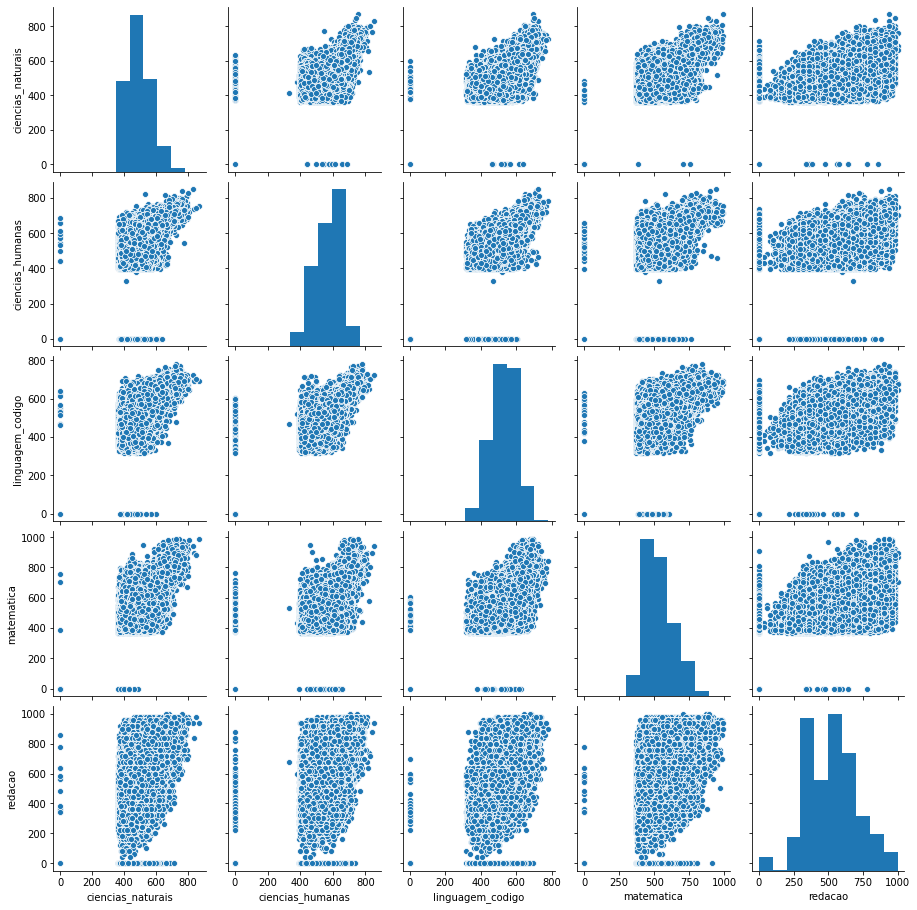

In [0]:
sns.pairplot(dados_notas)

#Desafio 1
**Se a pessoa não teve presença, preencha a nota dela com algum número. A nota 0? A nota média? A mediana?**

Ache melhor desconciderar, ao invés de colocar 0, filtrei e criei um novo DataFrame sem os ausentes.

In [0]:
col_notas_idade = ['NU_NOTA_CN','NU_NOTA_CH','NU_NOTA_LC','NU_NOTA_MT','NU_NOTA_REDACAO','NU_IDADE']

notas_idade = dados.query('TP_PRESENCA_CN==1 and TP_PRESENCA_CH==1 and TP_PRESENCA_LC==1 and TP_PRESENCA_MT==1 and TP_STATUS_REDACAO==1')[col_notas_idade]

notas_idade.columns = ['ciencias_naturais','ciencias_humanas','linguagem_codigo','matematica','redacao','idade']




#Desafio 2
**A matriz de correlação está feiosa, vamos deixar mais bonita? :) Não se esqueça de manter os valores dentro delas.**

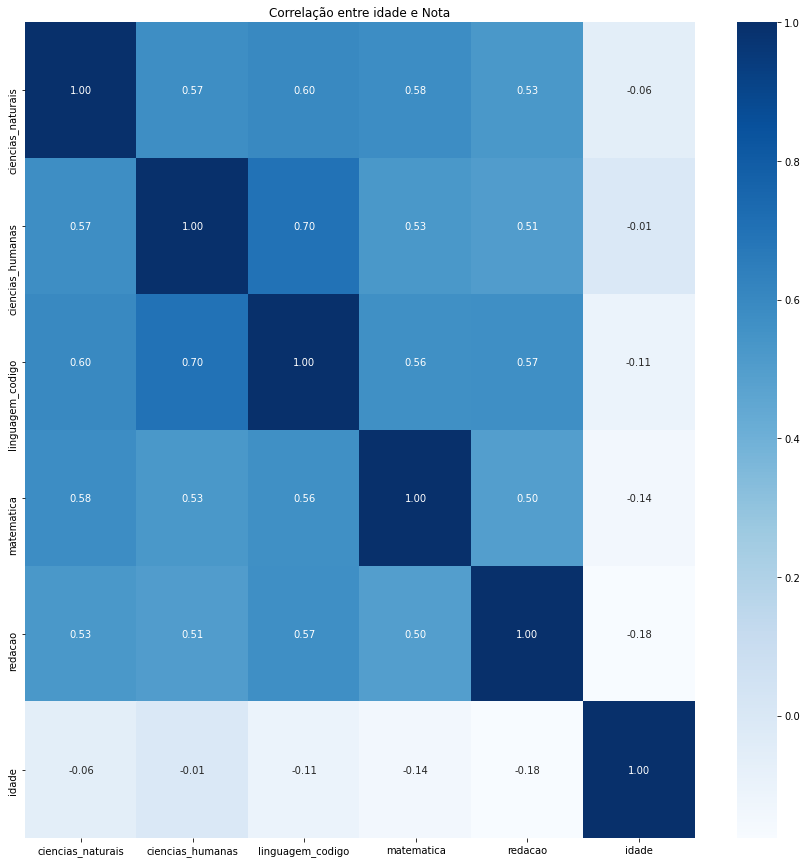

In [0]:
plt.figure(figsize=(15,15))
sns.heatmap(notas_idade.corr(),
            annot = True,
            fmt = '.2f',
            cmap='Blues')
plt.title('Correlação entre idade e Nota')
plt.show()



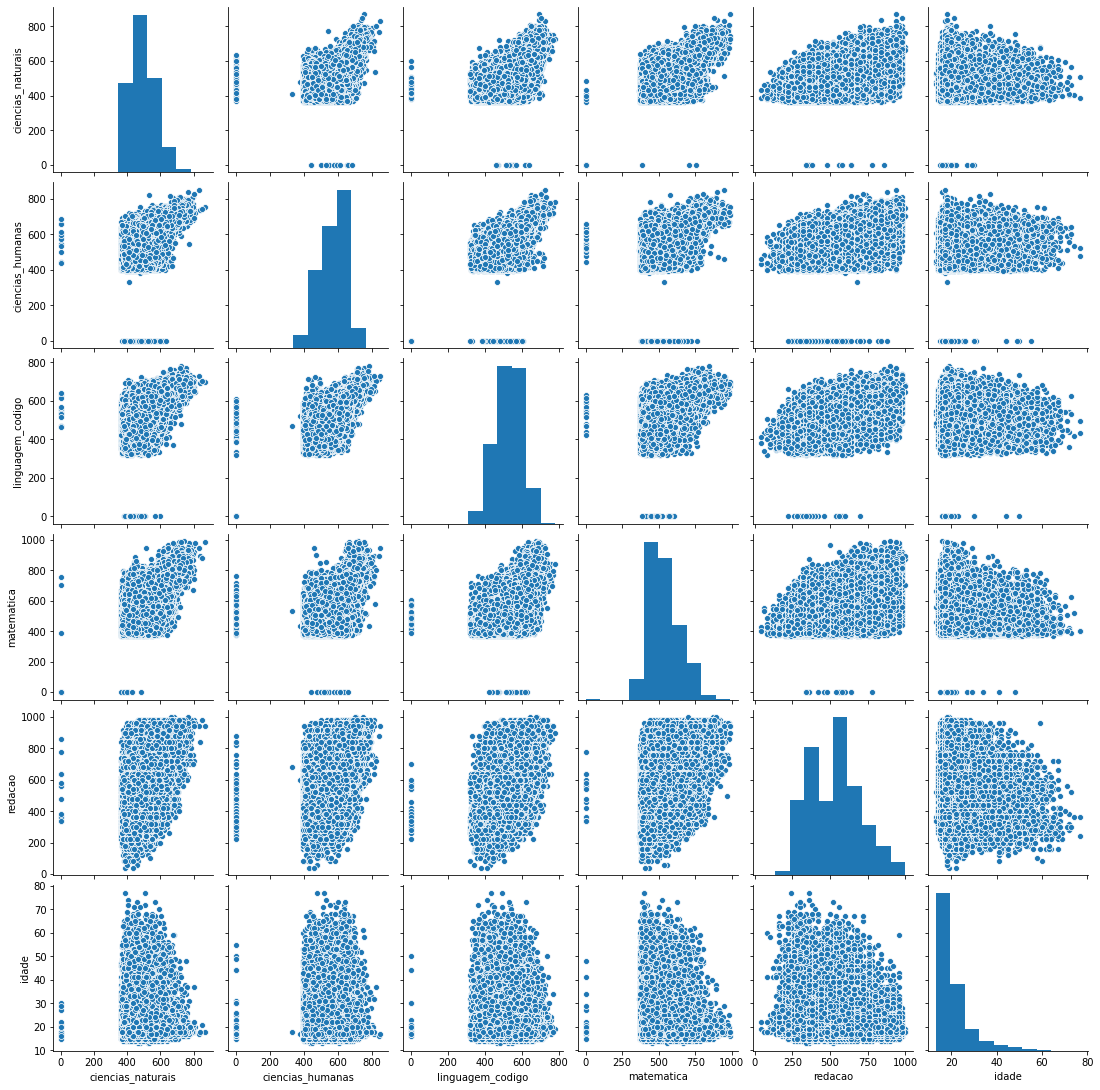

In [0]:
sns.pairplot(notas_idade)

In [0]:


col_notas_localidade = ['NU_NOTA_CN','NU_NOTA_CH','NU_NOTA_LC','NU_NOTA_MT','NU_NOTA_REDACAO','CO_MUNICIPIO_PROVA','CO_MUNICIPIO_RESIDENCIA']

notas_localidade = dados.query('TP_PRESENCA_CN==1 and TP_PRESENCA_CH==1 and TP_PRESENCA_LC==1 and TP_PRESENCA_MT==1 and TP_STATUS_REDACAO==1')[col_notas_localidade]

notas_localidade.columns = ['ciencias_naturais','ciencias_humanas','linguagem_codigo','matematica','redacao','PROVA','RESIDENCIA']

notas_localidade['MESMO_LOCAL'] = np.where(notas_localidade['PROVA']==notas_localidade['RESIDENCIA'],'Mesma cidade','Outra cidade')



In [0]:
notas_localidade

,ciencias_naturais,ciencias_humanas,linguagem_codigo,matematica,redacao,PROVA,RESIDENCIA,MESMO_LOCAL
1,523.10,671.30,661.60,738.00,680.00,3557105,3557105,Mesma cidade
2,409.20,531.70,389.00,438.10,600.00,2506301,2506301,Mesma cidade
3,452.30,505.50,448.50,544.90,400.00,3514403,3534807,Outra cidade
6,428.50,505.20,521.00,436.80,560.00,2709400,2701308,Outra cidade
8,491.80,575.70,524.40,487.60,660.00,2601102,2607307,Outra cidade
...,...,...,...,...,...,...,...,...
137835,511.50,606.90,504.80,513.40,520.00,2928703,2928703,Mesma cidade
137836,465.00,546.80,528.50,462.80,580.00,4106902,4106902,Mesma cidade
137838,576.20,610.40,538.30,486.80,820.00,2707701,2707701,Mesma cidade
137840,382.40,534.20,468.10,576.40,380.00,2111300,2111300,Mesma cidade


In [0]:
notas_localidade.drop(['PROVA','RESIDENCIA'],axis=1,inplace=True)


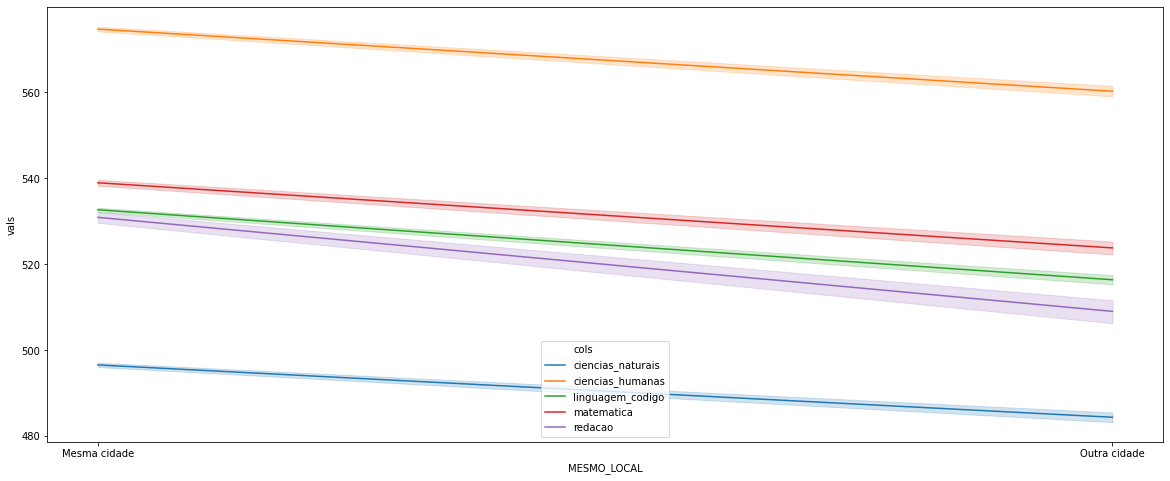

In [0]:
df =notas_localidade.groupby('MESMO_LOCAL').mean()
df = notas_localidade.melt('MESMO_LOCAL', var_name='cols',  value_name='vals')

plt.figure(figsize=(20,8))
sns.lineplot(data=df,x='MESMO_LOCAL',y='vals', hue='cols')



In [0]:
  df['MESMO_LOCAL'].str.slice(start=1, stop=1)

  

#Desafio 3
**Pairplot dos acertos de cada categoria (CN, CH, MT, LC, nota pura da redação). Usar o gabarito e as respostas**

In [0]:


def contAcertos(resposta,gabarito):
  acertos=0
  for i in range(0,len(resposta)):
    if(resposta[i]==gabarito[i]):
      acertos+=1
  return (acertos/len(resposta))*100



In [0]:
respostas_gabarito = dados[['TX_RESPOSTAS_CN','TX_RESPOSTAS_CH','TX_RESPOSTAS_LC','TX_RESPOSTAS_MT','TX_GABARITO_CN','TX_GABARITO_CH','TX_GABARITO_LC','TX_GABARITO_MT']]

respostas_gabarito.dropna(inplace=True)

respostas_gabarito.columns = ['R_CN','R_CH','R_LC','R_MT','G_CN','G_CH','G_LC','G_MT']

for i in respostas_gabarito.index:
  respostas_gabarito.at[i,'A_CN'] = contAcertos(respostas_gabarito.at[i,'R_CN'],respostas_gabarito.at[i,'G_CN'])


for i in respostas_gabarito.index:
  respostas_gabarito.at[i,'A_CH'] = contAcertos(respostas_gabarito.at[i,'R_CH'],respostas_gabarito.at[i,'G_CH'])


for i in respostas_gabarito.index:
  respostas_gabarito.at[i,'A_LC'] = contAcertos(respostas_gabarito.at[i,'R_LC'],respostas_gabarito.at[i,'G_LC'])


for i in respostas_gabarito.index:
  respostas_gabarito.at[i,'A_MT'] = contAcertos(respostas_gabarito.at[i,'R_MT'],respostas_gabarito.at[i,'G_MT'])



respostas_gabarito.head(20)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:845: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the

,R_CN,R_CH,R_LC,R_MT,G_CN,G_CH,G_LC,G_MT,A_CN,A_CH,A_LC,A_MT
1,CCAADAEEDCDAEEABADDECACBEEDDBDCCCEDACCADAACAC,ADECAADBACECBEEDBEDBABEBCBACCEBCAAECCDEDABACD,CBEDB99999ECADEABEADEAACABDADACDCCBCEEBBADCDAB...,ADDEDEEBCAADDEDEBECCBAECECEDBAADEABAECDADECDC,BCACEEBBBDACEDECAADDDABDBCCACDCBCEDEDABEBEAEA,CDECAABBDDECBEEDBEBBEBEDEEEBCEAEECECCDBDDCACD,CBEDBBBDCBECADBBBECBEAECABDADACDBABCECBBEDADAB...,ADAEDABBCAADBEXEBBDEEADCCCCDACEDDABCBCAAEBBDD,24.44,60.00,66.00,48.89
2,AEEEBDBBCADADBBCCCDCCBEEDABACAACCADDBBDACBAAC,AAACCCBAEBBEBEEAAEDCAAEABDEBBCDCCBADEABADBCAD,99999ABEDADDAACEBDACAEACBAAABDBABCABABABEBBEBB...,ABCBEECAABDDADCACAAAABDDEDACAEEECCDCEBBABBECB,BDDEDBCACEBCCACDCDDAECAADBDBCEEAEAABEBEBBACED,CACDDBDDECCEDEEEBCEAEECBBEBEDBEDECBEBDCAABCDE,BBDECBBCDBCECBABDBEDACDDBBBEADECACEDBEBABCBEAE...,ACEADCEBBDADAAEBBDDEDABADBEXCCCDBCAEEACBCDDAB,17.78,20.00,16.00,13.33
3,BBDEDDDCDACDADBBBCEAACAAAACECBCADEDBECCAADACB,DABECDAECBADCAECDDAECAEDBDDDCABDECCCAABEDADCD,AEDBB99999DDADECBBEEADABBBECAEBCCACECABBADABCD...,DEBEBEABDABECACDDDECBBDDBCBBCABDAACCECBABDCDA,ACEDEAEAEBECAADABBDBCEDEDDCDDABCCACBCACEBDEBB,ECCBBEBEDBEDBDDAEECDECBECACDEDEECDECAABBDEBCE,BCDEBDBCBBACDCBEAECBABADBBECECBDBBEABDADACEDEC...,EBBDEECCCDACEADCBCAAEBBCBCADAEDABADDADDABDBEX,15.56,22.22,22.00,22.22
6,BBCCAAECEACBCADDAECABCEBDDADCCEACDBCEBCAABDEB,ABBADAEAACCABAABCACBEBADCDECABCCDAECACBDDCDEB,99999EEABBDEEBAECBBACBEACBDCBDDCEBEDBDADACABCC...,CCECCBDECCEBABADBDAACEBDBBCEEACDCABAECBCABDEC,ACEDEAEAEBECAADABBDBCEDEDDCDDABCCACBCACEBDEBB,ECCBBEBEDBEDBDDAEECDECBECACDEDEECDECAABBDEBCE,BCDEBDBCBBACDCBEAECBABADBBECECBDBBEABDADACEDEC...,EBBDEECCCDACEADCBCAAEBBCBCADAEDABADDADDABDBEX,24.44,20.00,30.00,17.78
8,CEDADAADADEBBAEABCBEDEBCEBEEDCAACEADBDEBDCBDE,BEECACBAEECEBDEEADEDEDEBDBAACBBADBEADCBDAABEA,CBBDE99999ECAEBABACEEBCABBADAEACCCBAEABCCBCEAA...,BDCADDBCDBDBEBCEDADCEBBACECBAAEBDDBDCABECDADA,EBBEBACEDDEDDCBCCACBDDDAECAADBCEABEAEABDBCACE,CDECAABBDDECBEEDBEBBEBEDEEEBCEAEECECCDBDDCACD,CBEDBBBDCBECADBBBECBEAECABDADACDBABCECBBEDADAB...,ADCACEDDABEBBCBCADDACCCDEBBDAEEDBEXBCAEDABADA,17.78,26.67,30.00,28.89
9,ADDCEEBCDDBCADCCBCBBACDEBBACAAAADACACADEEBCEB,BEDCABBBEDEABEEDAEBBCEECBEACCEDAECEABDBDAEACE,99999BBDCCEDADEAEABDEBABABDADACDCABCECBBADABCB...,CCBDDEECBAAECCDDBDAEDBAEDDAABDBDEACBECBEAADDE,ACEDEAEAEBECAADABBDBCEDEDDCDDABCCACBCACEBDEBB,CDECAABBDDECBEEDBEBBEBEDEEEBCEAEECECCDBDDCACD,CBEDBBBDCBECADBBBECBEAECABDADACDBABCECBBEDADAB...,EBBDEECCCDACEADCBCAAEBBCBCADAEDABADDADDABDBEX,33.33,55.56,56.00,24.44
10,AEDBDACADEDABAEDADBACCAADBDEAABCBACBEAAABAABC,EDBABBBEDDECBBAEEEDBCCBDCECDEDEEAAEAAEBDDABEE,ACDAB99999ACDEAEAAABCBADBBBCEBBDDBEABDCDBEEDEC...,EADADCEABAAAADDABDAEAAAADEEACECDBDAEEEEBEDDAC,BDDEDBCACEBCCACDCDDAECAADBDBCEEAEAABEBEBBACED,ECCBBEBEDBEDBDDAEECDECBECACDEDEECDECAABBDEBCE,BCDEBDBCBBACDCBEAECBABADBBECECBDBBEABDADACEDEC...,ACEADCEBBDADAAEBBDDEDABADBEXCCCDBCAEEACBCDDAB,44.44,53.33,58.00,55.56
11,ADBAECCAAACBEEDABBDBACDBECADDDDEBDBEBACEBDCCE,EAACACEBBACCCCDCBEEDDDAEEEEEEDCAEBEDBEEAAECBB,99999CEBDBEBEADECBBBDBBADABACCABBBACDECBCDDACD...,BDBDCEEEABBBCADDDCBAEEACCEDACCACCABBADDAAEDBC,ACEDEAEAEBECAADABBDBCEDEDDCDDABCCACBCACEBDEBB,AEECDECBEBDCACDEDEEDBDDEBCECDECAABEDBEBBEBECC,BBEDCCBBDBBBEADECACEDBEADABEDBABAECCBEABDDBACD...,EBBDEECCCDACEADCBCAAEBBCBCADAEDABADDADDABDBEX,37.78,40.00,54.00,31.11
12,DCEBBEBEEEDDBDBCCABDCABACEBCBCDCEDBBCDAABBDCE,CEACADBADBECBCBDBEABECCBEAEDCEBECEEBBDBDADBED,99999DBADCABBCDABEDCCBBCDBCBEDACABCCDCBBCEBAAB...,EDCBADACBEDCDCCBDBDDBCBEACDBBCBACACCEBAACBECC,BDDEDBCACEBCCACDCDDAECAADBDBCEEAEAABEBEBBACED,CDECAABBDDECBEEDBEBBEBEDEEEBCEAEECECCDBDDCACD,CBEDBBBDCBECADBBBECBEAECABDADACDBABCECBBEDADAB...,ACEADCEBBDADAAEBBDDEDABADBEXCCCDBCAEEACBCDDAB,13.33,51.11,22.00,15.56
13,EBDECAADDCCBBCEBCABEDCCDDACDDDBCBADCDDBEDEEBD,AACDDEAAECCAADEEDCABADEAABDEDAAACEBDAEDAEAEDC,99999BBCDBCDCBABCBACDDDCBABBEAECACEBAECABCDDCB...,AABDDDCDDEADACCEABECECBBABAEEBCADBBCCBACECABA,BCACEEBBBDACEDECAADDDABDBCCACDCBCEDEDABEBEAEA,CACDDBDDECCEDEEEBCEAEECBBEBEDBEDECBEBDCAABCDE,BBDECBBCDBCECBABDBEDACDDBBBEADECACE

In [0]:
 respostas_gabarito[['A_CN','A_CH','A_LC','A_MT']].describe()

,A_CN,A_CH,A_LC,A_MT
count,"97,270.00","97,270.00","97,270.00","97,270.00"
mean,26.07,35.69,34.14,26.00
std,10.66,16.13,13.43,11.01
min,0.00,0.00,0.00,0.00
25%,20.00,24.44,24.00,17.78
50%,24.44,33.33,32.00,24.44
75%,31.11,44.44,44.00,31.11
max,97.78,100.00,82.00,95.56


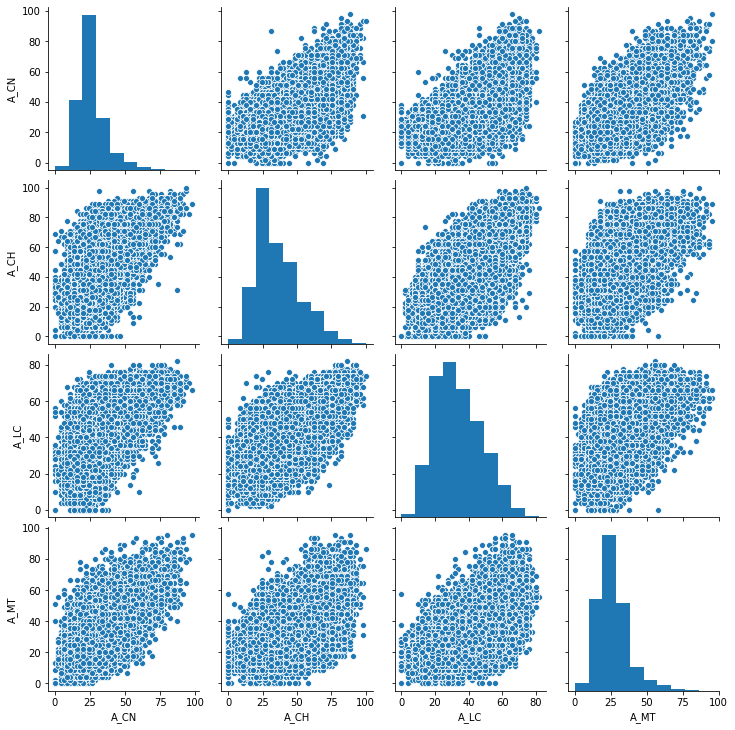

In [0]:
sns.pairplot(data=respostas_gabarito[['A_CN','A_CH','A_LC','A_MT']])

**Desafio 4
**Remover todos os zeros. Tomar o cuidado que no desafio 1 já tomamos decisões ligadas a limpeza dos dados também. Você também pode exportar para outro CSV se quiser.**

#Desafio 5
**Quais questões tiveram mais erros (análise sobre o gabarito x acertos x erros)**

As que tiveram mais acertos foram as de ciências Humanas, mais erros foram as de matemática

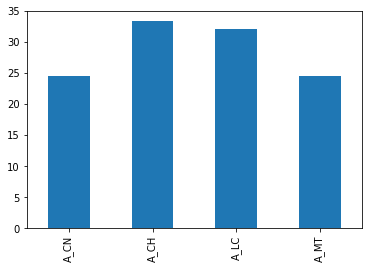

In [0]:
respostas_gabarito.query("A_CN!=''").median().plot(kind='bar')